# *Keras* (TensorFlow)

#### Q: What is TensorFlow?

A: Tensorflow is the open source library for building/training neural networks. It represents operations as dataflow graphs. It is written in CUDA (a parallel computing platform for working on GPUs) and C++ for performance.

([Nice read](https://colah.github.io/posts/2015-08-Backprop/) on doing backprop on computational graphs.)

#### Q: What is keras?

A: Keras is an API "connecting" python to TensorFlow.

It is a deep learning API written in Python to handle several backends (TensorFlow, Microsoft Cognitiv Toolkit, Theano). Since TensorFlow 1.4 it is part of TensorFlow. It was developed with a focus on enabling fast experimentation.

#### Q: What is a tensor?

A: An n-dimensional array/matrix. "Container which can house data in n dimensions"

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import tensorflow as tf

In [3]:
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensor Flow Version: 2.11.0
Keras Version: 2.11.0


In [4]:
gpu = tf.config.list_physical_devices('GPU')
print('GPU is available' if gpu else 'GPU is not available')

GPU is available


If Keras/TensorFlow aren't working for you, you can use [Google Colab](https://colab.research.google.com) or [Kaggle Kernels](https://www.kaggle.com/code).

### Warmup: [tensorflow playground](https://playground.tensorflow.org/)

Build by playing / play by building a neural network in your browser. Test out different configurations and different datasets. Add and remove layers and neurons. Play with the learning rate. Try out different datasets. What do you notice?

* For the first three datasets we don't need the hidden layers, but we need to do feature engineering (e.g. using $x_1^2$ and $x_2^2$).
* Adding hidden layers does feature engineering for us.
* First hidden layer captures linear decision boundaries — deeper layers start to capture non linearity.
* Using linear activation function leads to linear decision boundary, no matter the number of layers and neurons.
* Sigmoid performs quite poorly on these tasks; tanh much better, even though it has similar shape (but is centered around 0); ReLU performs very well.

### Task: train a neural network to classify which of the two moons (in the `make moons` dataset) a datapoint belongs to.

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.2, random_state=101)

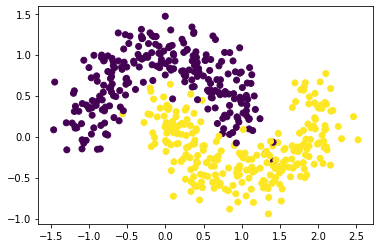

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)

## Steps in building an ANN with Keras

1. _Configure_

(NN architecture)

* number of layers
* type of layers
* number of neurons
* type of activation functions

2. _Compile_

* loss function (what we're optimizing; the choice of loss function depending on the problem we are solving)
* optimizers (algorithm that finds the minimum of the loss function)
* metrics (metrics to be tracked over training)

3. _Fit_

* epochs (number of times the algorithm goes through the whole dataset)
* batch size (number of data points a model takes into account for a single weights update)
* validation split (which fraction of the data is used as a validation set)

4. _Evaluate_

5. _Predict_

In [2]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Activation
from tensorflow.keras.optimizers import Adam

In [62]:
# (re)run this as soon as you want to restart creating a model!
K.clear_session()
model = Sequential()

In [63]:
X[0].shape

(2,)

### 1. Configure

##### Input layer

In [64]:
# explicit input layer is optional — we could also add the input layer shape into our first dense layer
# input shape is the shape of the _single data point_
model.add(InputLayer(input_shape=X[0].shape))

##### Hidden layer

In [65]:
model.add(Dense(units=20, activation='relu'))

In [66]:
# frequently the two layers above are defined as one like this:
#model.add(Dense(units=8, activation='sigmoid', input_shape=X[0].shape))

##### Output layer

In [67]:
model.add(Dense(units=1, activation='sigmoid'))

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


Why this number of parameters?

Other formulations of the same network:

In [18]:
model_ = Sequential([
    Dense(8, input_shape=X[0].shape, activation='sigmoid', name='hidden'),
    Dense(1, activation='sigmoid', name='output'),
])

In [19]:
model_.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 8)                 24        
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [20]:
model__ = Sequential([
    Dense(8, input_shape=X[0].shape),
    Activation('sigmoid'),
    Dense(1),
    Activation('sigmoid'),
])

In [21]:
model__.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 24        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


### 2. Compile

At this step keras communicates with TensorFlow and creates "computational graph".

* `loss` — what we optimize
* `optimizer` — how we get from a bad model to a good model
* `metrics` — how "humans" evaluate the model

In [69]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics='accuracy')

More on how to choose the optimizer, activation function, loss function, etc. tomorrow morning.

### 3. Fit

* `epochs` — number of times the NN sees your whole dataset
* `batch_size` — number of samples used in each weights update
* `validation_split` — portion of results used for validation

In [70]:
history = model.fit(X, y, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 30ms/step - loss: 0.5591 - accuracy: 0.8350 - val_loss: 0.4618 - val_accuracy: 0.9000
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.4643 - accuracy: 0.8200 - val_loss: 0.3771 - val_accuracy: 0.8900
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.4008 - accuracy: 0.8125 - val_loss: 0.3185 - val_accuracy: 0.8900
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.3597 - accuracy: 0.8275 - val_loss: 0.2787 - val_accuracy: 0.9000
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3342 - accuracy: 0.8425 - val_loss: 0.2489 - val_accuracy: 0.9000
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3146 - accuracy: 0.8550 - val_loss: 0.2284 - val_accuracy: 0.9100
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3003 - accuracy: 0.8600 - val_loss: 0.2156 - val_accuracy: 0.9200
Epoch 8/100
7/7 [====

In [55]:
0.8*500/64

6.25

### 4. Evaluate

In [71]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

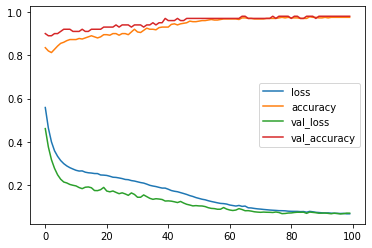

In [72]:
pd.DataFrame(history.history).plot()

### 5. Predict

In [73]:
ypred = model.predict(X)

16/16 [==============================] - 0s 2ms/step


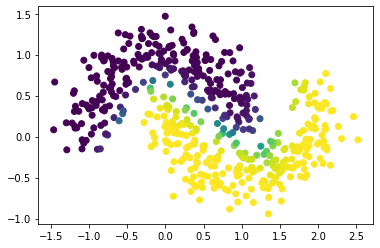

In [74]:
plt.scatter(X[:,0], X[:,1], c=ypred)

In [75]:
ypred = np.round(ypred)

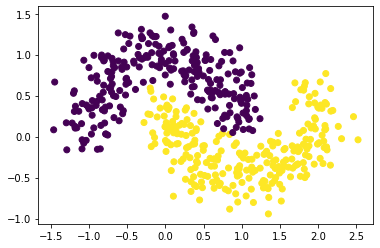

In [76]:
plt.scatter(X[:,0], X[:,1], c=ypred)

### 6. Save a model

In [77]:
from tensorflow.keras.models import load_model

model.save("model_moons.h5")

In [78]:
moons_model = load_model("model_moons.h5")

In [79]:
moons_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [80]:
moons_model.get_weights()

[array([[ 0.6844243 , -1.6526196 , -1.0141114 , -0.00498074,  1.9219719 ,
         -1.6170675 , -1.0388838 , -0.6616313 , -0.2803606 , -2.089579  ,
         -1.089111  , -1.7214037 ,  0.87003124,  1.2632093 , -0.86386967,
          0.62717175,  0.96537846, -1.3095164 ,  0.13714838, -1.7337126 ],
        [-0.87391907,  0.8911438 ,  0.7805202 , -0.03877844,  1.0779679 ,
         -0.08899523,  0.7276735 , -0.83110493, -0.9925527 , -0.20343627,
         -0.8391897 , -0.10288031,  1.5380391 , -0.5464867 , -0.6458133 ,
          1.5283049 ,  1.2468991 ,  0.5935904 , -0.7819084 , -0.1087301 ]],
       dtype=float32),
 array([-0.4209478 , -0.49636447, -0.4530026 , -0.18582271, -2.192189  ,
        -0.26392567, -0.42984205,  0.83603555,  0.8559582 , -0.36269465,
         1.2186234 , -0.27793086,  0.03005304, -1.0245188 ,  0.9591945 ,
         0.13667835, -0.0518952 , -0.3640365 ,  0.7240684 , -0.27621013],
       dtype=float32),
 array([[ 0.83014596],
        [-1.1306235 ],
        [-1.1619372 

In [ ]:
hidden = moons_model.get_layer

References:
* keras models api: https://keras.io/api/models/
* keras layers api: https://keras.io/api/layers/
* keras optimizer api: https://keras.io/api/optimizers/
* keras metrics api: https://keras.io/api/metrics/
* keras losses api: https://keras.io/api/losses/

* For nice model visualization and to track experiments use https://www.tensorflow.org/tensorboard/get_started